# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=0.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

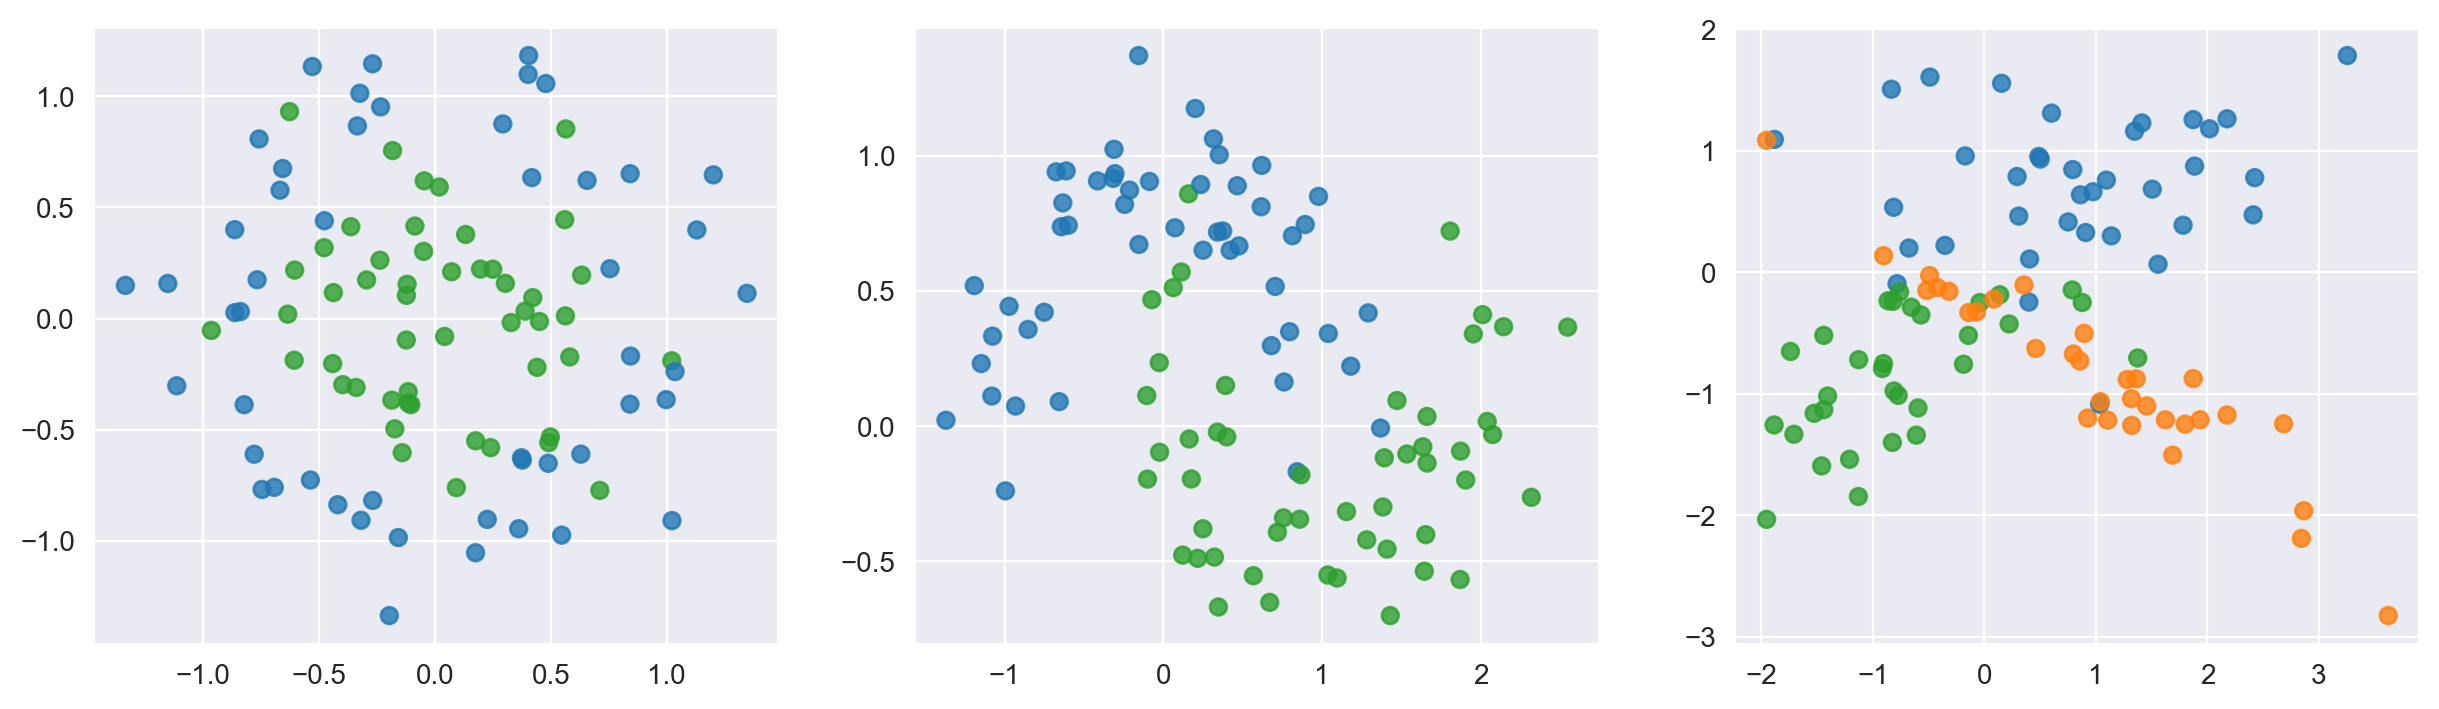

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

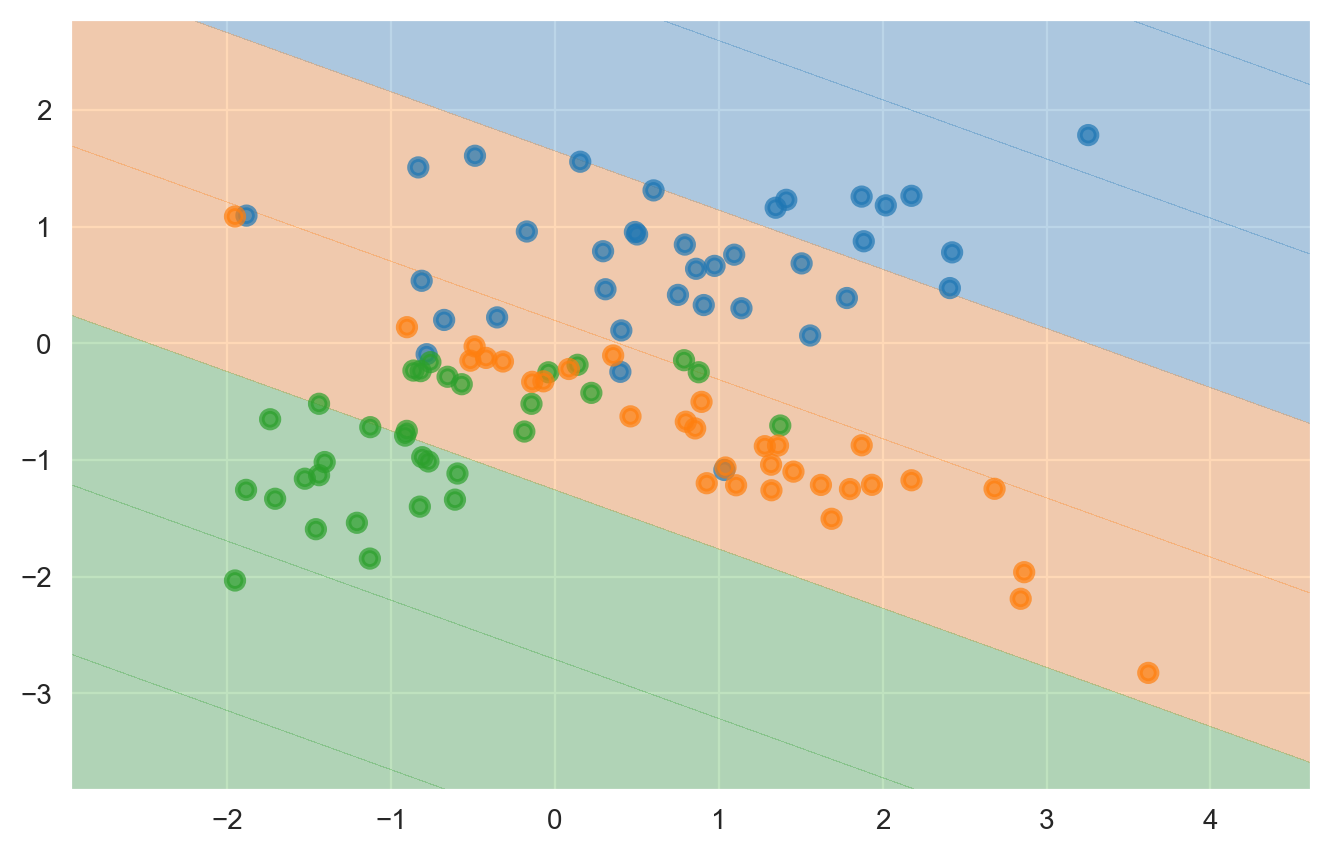

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

(1.0, 0.72)

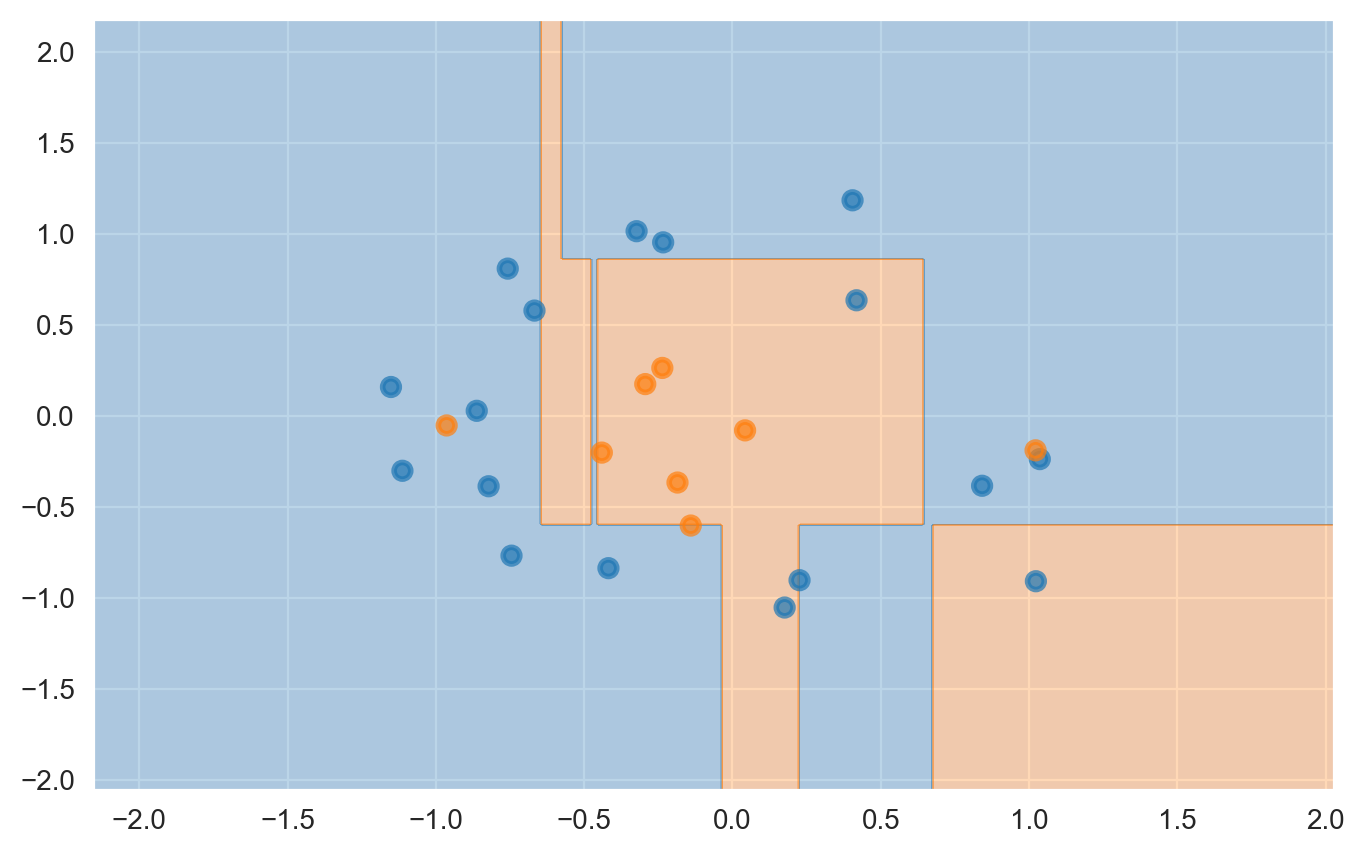

In [7]:
from sklearn.tree import DecisionTreeClassifier

X0_train, X0_test, y0_train, y0_test = train_test_split(datasets[0][0], datasets[0][1], random_state=42, shuffle=True)
t0 = DecisionTreeClassifier().fit(X0_train, y0_train)
plot_surface(t0, X0_test, y0_test)
acc0_train = accuracy_score(y0_train, t0.predict(X0_train))
acc0_test = accuracy_score(y0_test, t0.predict(X0_test))
acc0_train, acc0_test

(1.0, 0.92)

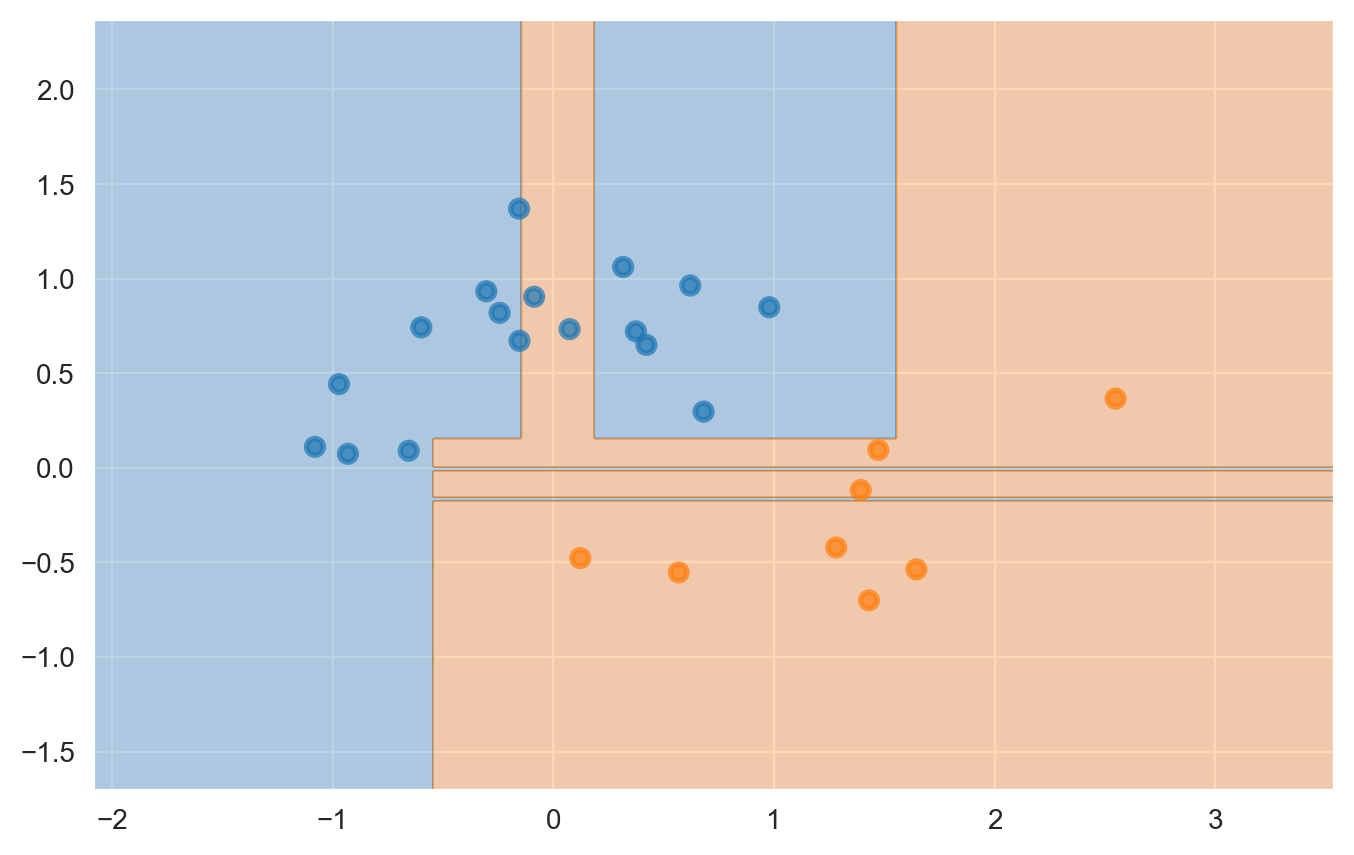

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(datasets[1][0], datasets[1][1], random_state=42, shuffle=True)
t1 = DecisionTreeClassifier().fit(X1_train, y1_train)
plot_surface(t1, X1_test, y1_test)
acc1 = accuracy_score(y1_test, t1.predict(X1_test))
acc1_train = accuracy_score(y1_train, t1.predict(X1_train))
acc1_test = accuracy_score(y1_test, t1.predict(X1_test))
acc1_train, acc1_test

(1.0, 0.72)

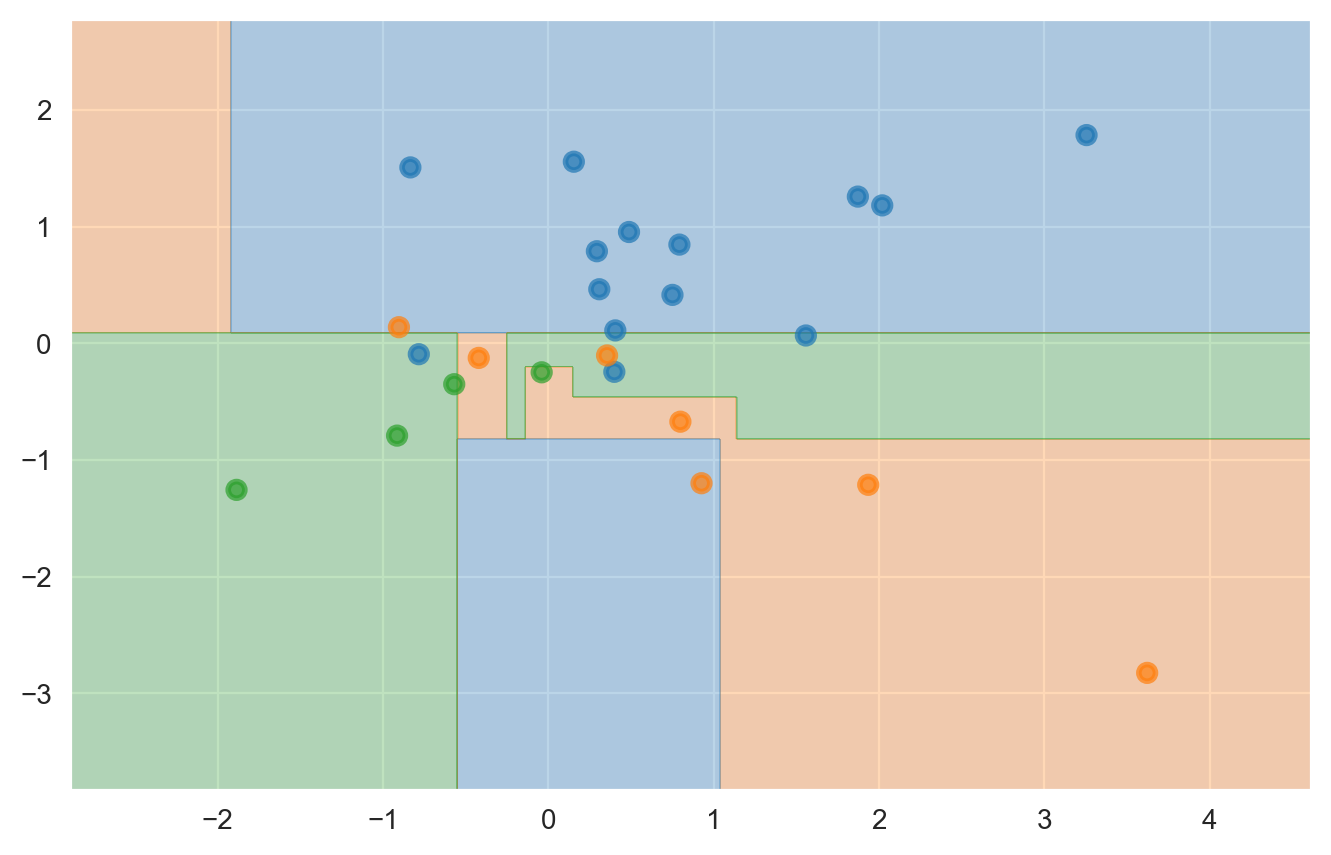

In [9]:
X2_train, X2_test, y2_train, y2_test = train_test_split(datasets[2][0], datasets[2][1], random_state=42, shuffle=True)
t2 = DecisionTreeClassifier().fit(X2_train, y2_train)
plot_surface(t2, X2_test, y2_test)
acc2 = accuracy_score(y2_test, t2.predict(X2_test))
acc2_train = accuracy_score(y2_train, t2.predict(X2_train))
acc2_test = accuracy_score(y2_test, t2.predict(X2_test))
acc2_train, acc2_test

__Ответ:__

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

(0.9466666666666667, 0.84)

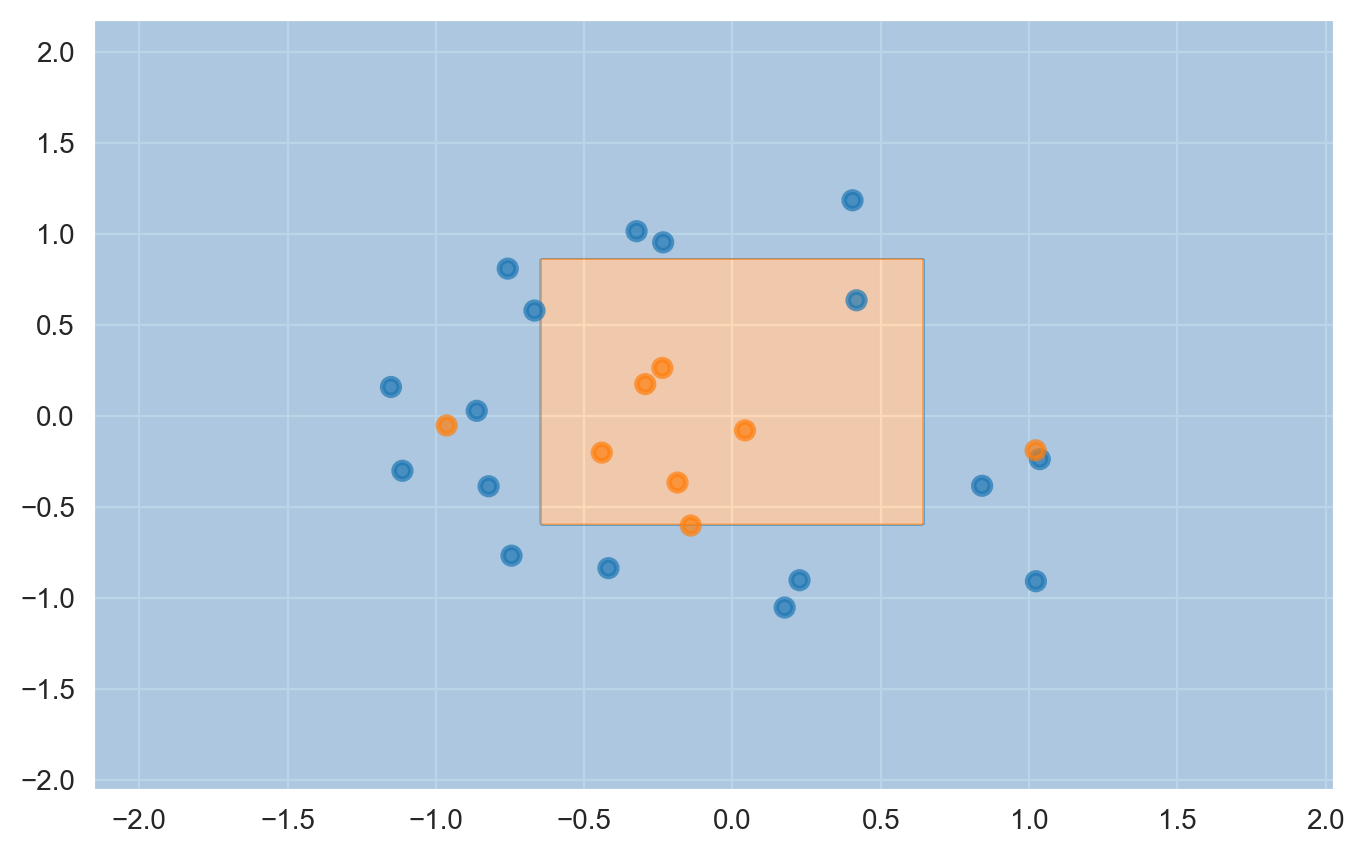

In [10]:
t10 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5).fit(X0_train, y0_train)
plot_surface(t10, X0_test, y0_test)
acc10_train = accuracy_score(y0_train, t10.predict(X0_train))
acc10_test = accuracy_score(y0_test, t10.predict(X0_test))
acc10_train, acc10_test

(0.88, 1.0)

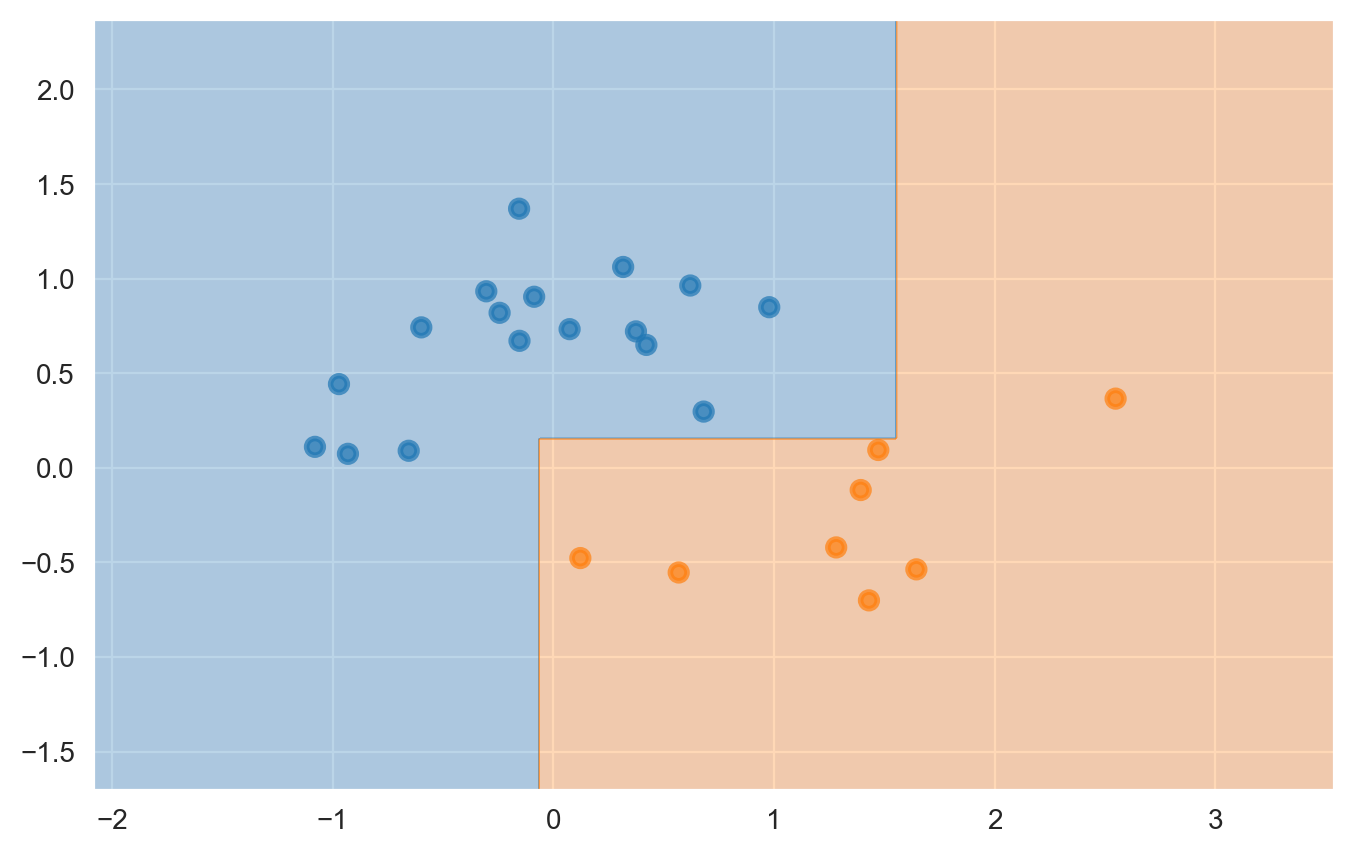

In [11]:
t11 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4).fit(X1_train, y1_train)
plot_surface(t11, X1_test, y1_test)
acc11_train = accuracy_score(y1_train, t11.predict(X1_train))
acc11_test = accuracy_score(y1_test, t11.predict(X1_test))
acc11_train, acc11_test

(0.88, 0.8)

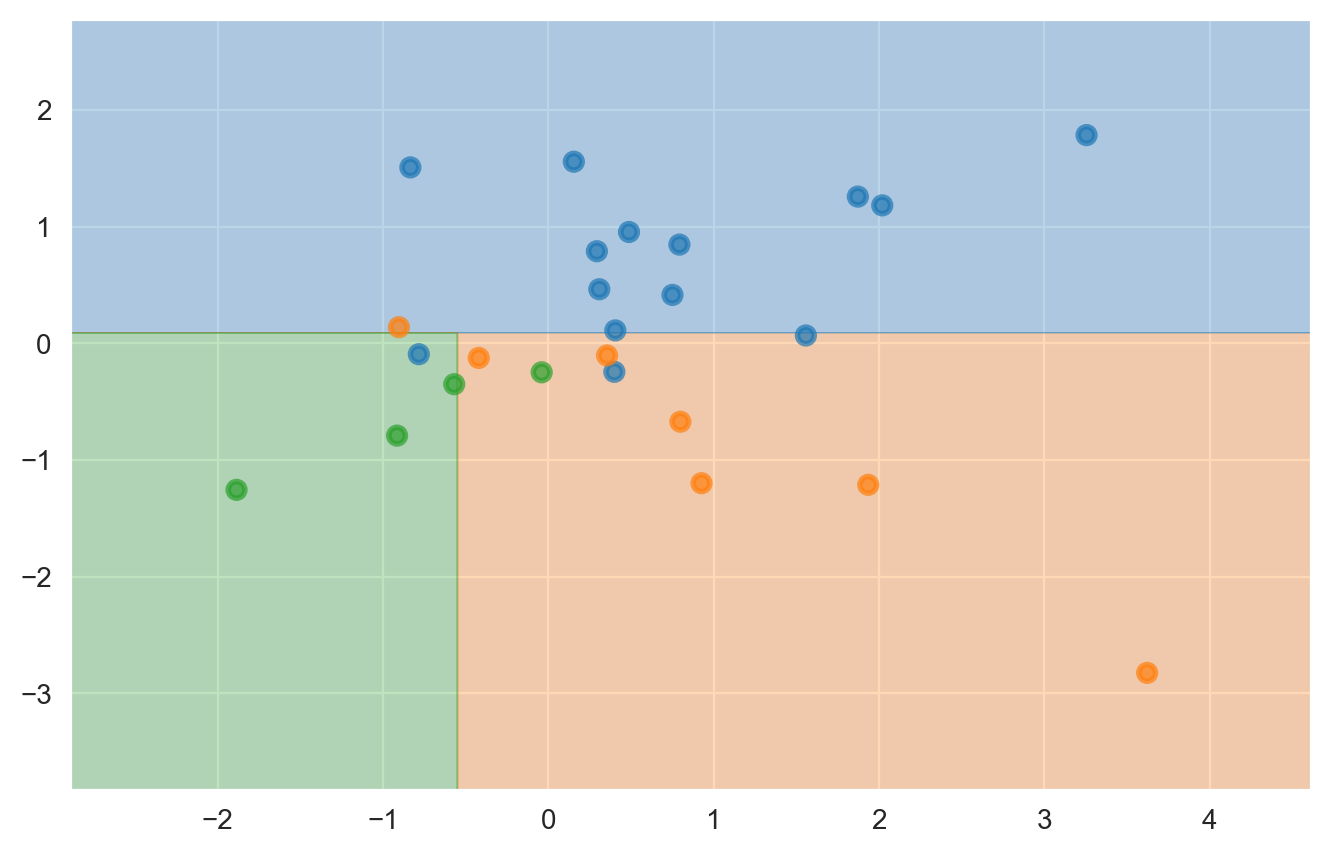

In [12]:
t12 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5).fit(X2_train, y2_train)
plot_surface(t12, X2_test, y2_test)
acc12_train = accuracy_score(y2_train, t12.predict(X2_train))
acc12_test = accuracy_score(y2_test, t12.predict(X2_test))
acc12_train, acc12_test

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [13]:
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


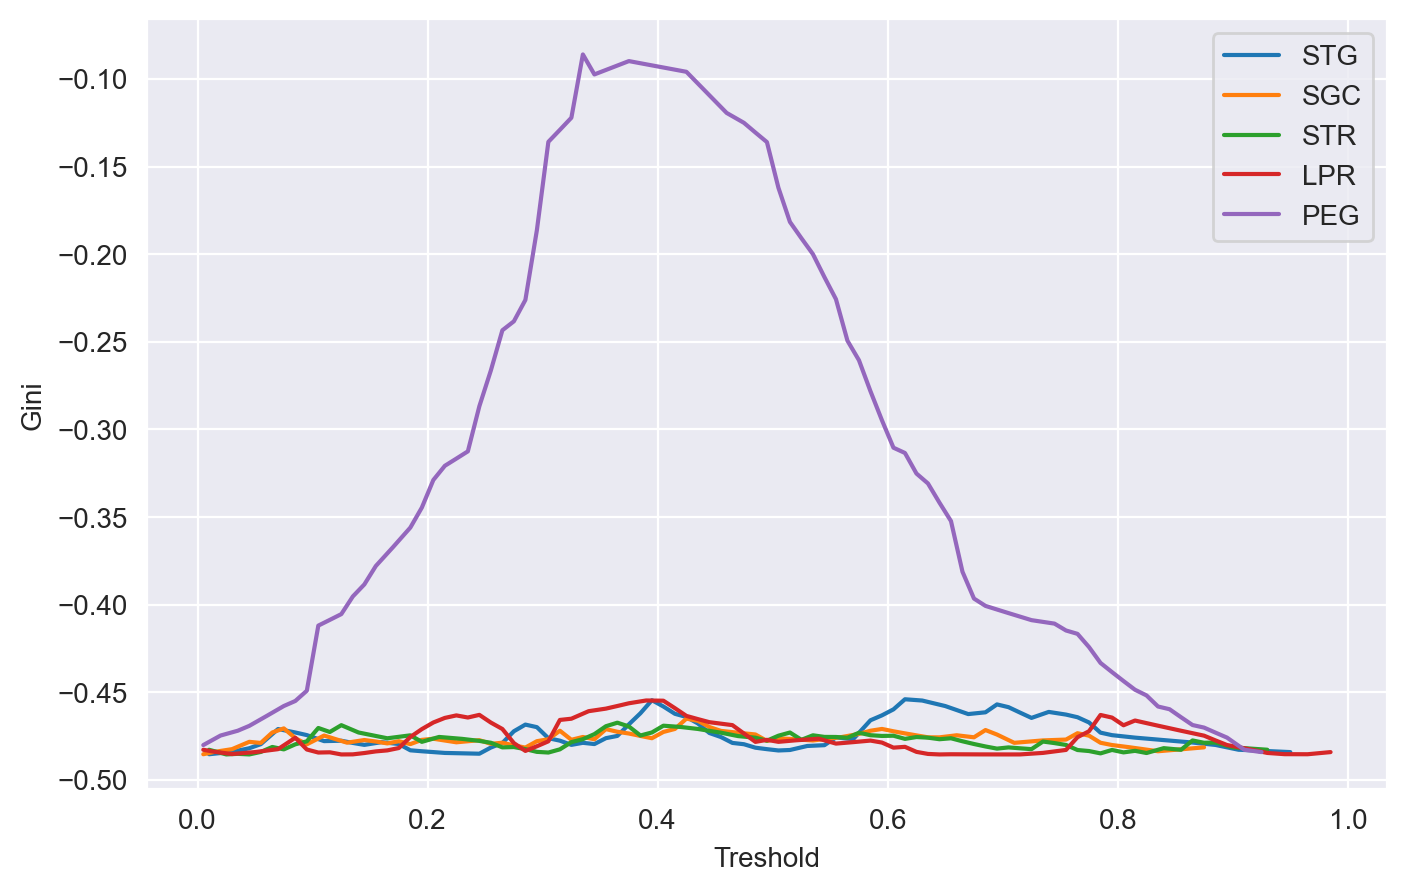

In [14]:
from hw5code import find_best_split
name = ['STG', 'SGC', 'STR', 'LPR', 'PEG']

for i in range(5):
    tresholds, ginis, _, _ = find_best_split(data.iloc[:,i].to_numpy(), data['UNS'].to_numpy())
    plt.plot(tresholds, ginis, label=name[i])
plt.grid(True)
plt.legend()
plt.xlabel('Treshold')
plt.ylabel('Gini')
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
mushroom = fetch_ucirepo(id=73) 

feat = mushroom.data.features 
target = mushroom.data.targets 

feat = feat.drop('stalk-root', axis=1)

target[target['poisonous'] == 'p'] = 1
target[target['poisonous'] == 'e'] = 0

feat_train, feat_test = train_test_split(feat, test_size=0.3, random_state=42)
target_train, target_test = train_test_split(target, test_size=0.3, random_state=42)

In [16]:
feat.isna().sum(), target[target['poisonous'] == 1].count()

(cap-shape                   0
 cap-surface                 0
 cap-color                   0
 bruises                     0
 odor                        0
 gill-attachment             0
 gill-spacing                0
 gill-size                   0
 gill-color                  0
 stalk-shape                 0
 stalk-surface-above-ring    0
 stalk-surface-below-ring    0
 stalk-color-above-ring      0
 stalk-color-below-ring      0
 veil-type                   0
 veil-color                  0
 ring-number                 0
 ring-type                   0
 spore-print-color           0
 population                  0
 habitat                     0
 dtype: int64,
 poisonous    3916
 dtype: int64)

In [17]:
a = feat_train.copy()
b = target_train.copy()
a = a.to_numpy()
b = b.to_numpy()
a[b[:,0]==1, 10]

array(['s', 'k', 'k', ..., 'f', 'k', 's'], shape=(2735,), dtype=object)

In [50]:
from hw5code import DecisionTree
from sklearn.metrics import accuracy_score

mod = DecisionTree(feature_types=np.full((feat.shape[1]), 'categorical'))
mod.fit(feat_train.to_numpy(), target_train.to_numpy().ravel())

score = accuracy_score(target_test.to_numpy().ravel().astype(int), mod.predict(feat_test.to_numpy()))
score

0.9237079573420837

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

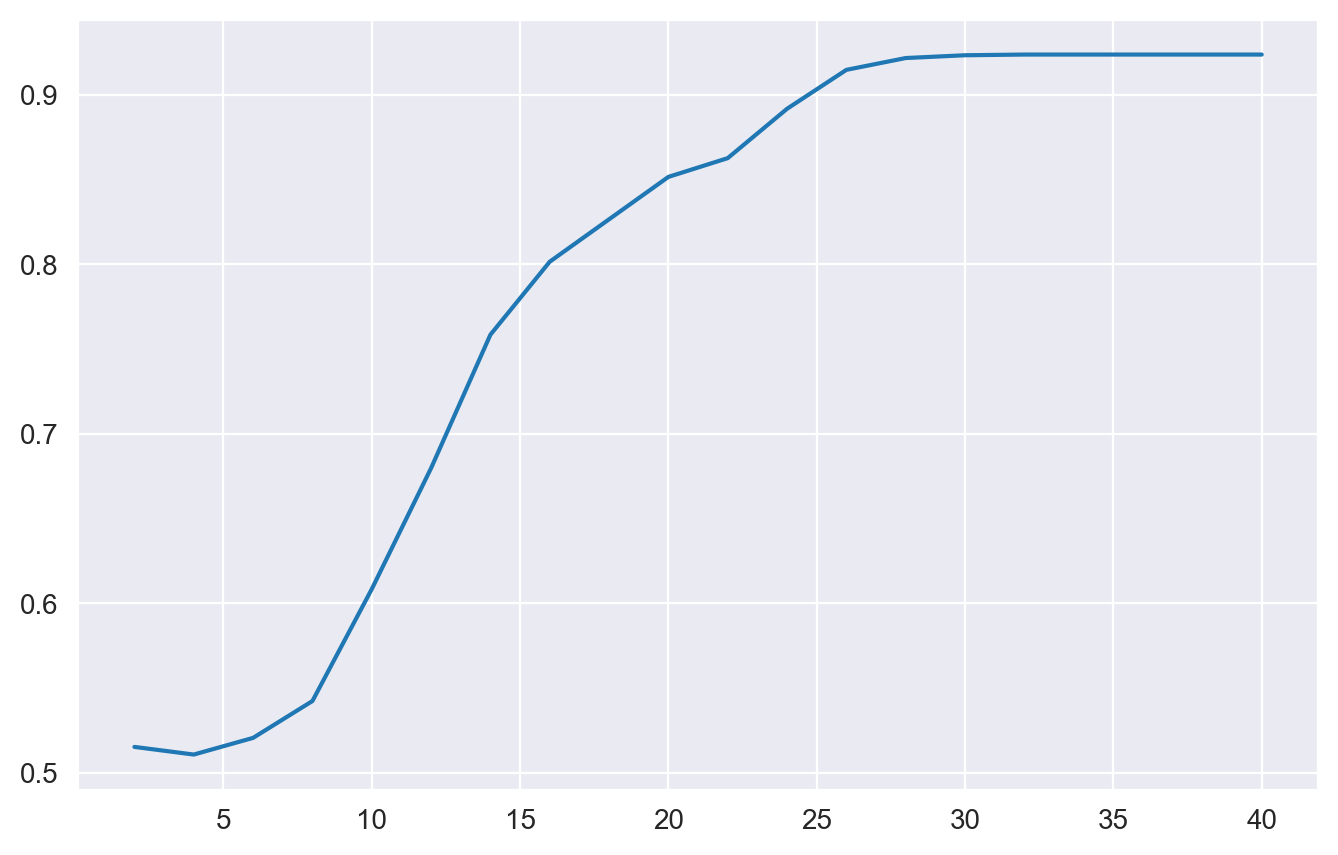

In [19]:
scores = []
for max_depth in range(2, 42, 2):
    mod = DecisionTree(feature_types=np.full((feat.shape[1]), 'categorical'), max_depth=max_depth)
    mod.fit(feat_train.to_numpy(), target_train.to_numpy().ravel())

    score = accuracy_score(target_test.to_numpy().ravel().astype(int), mod.predict(feat_test.to_numpy()))
    scores.append(score)
plt.plot(range(2, 42, 2), scores)
plt.show()

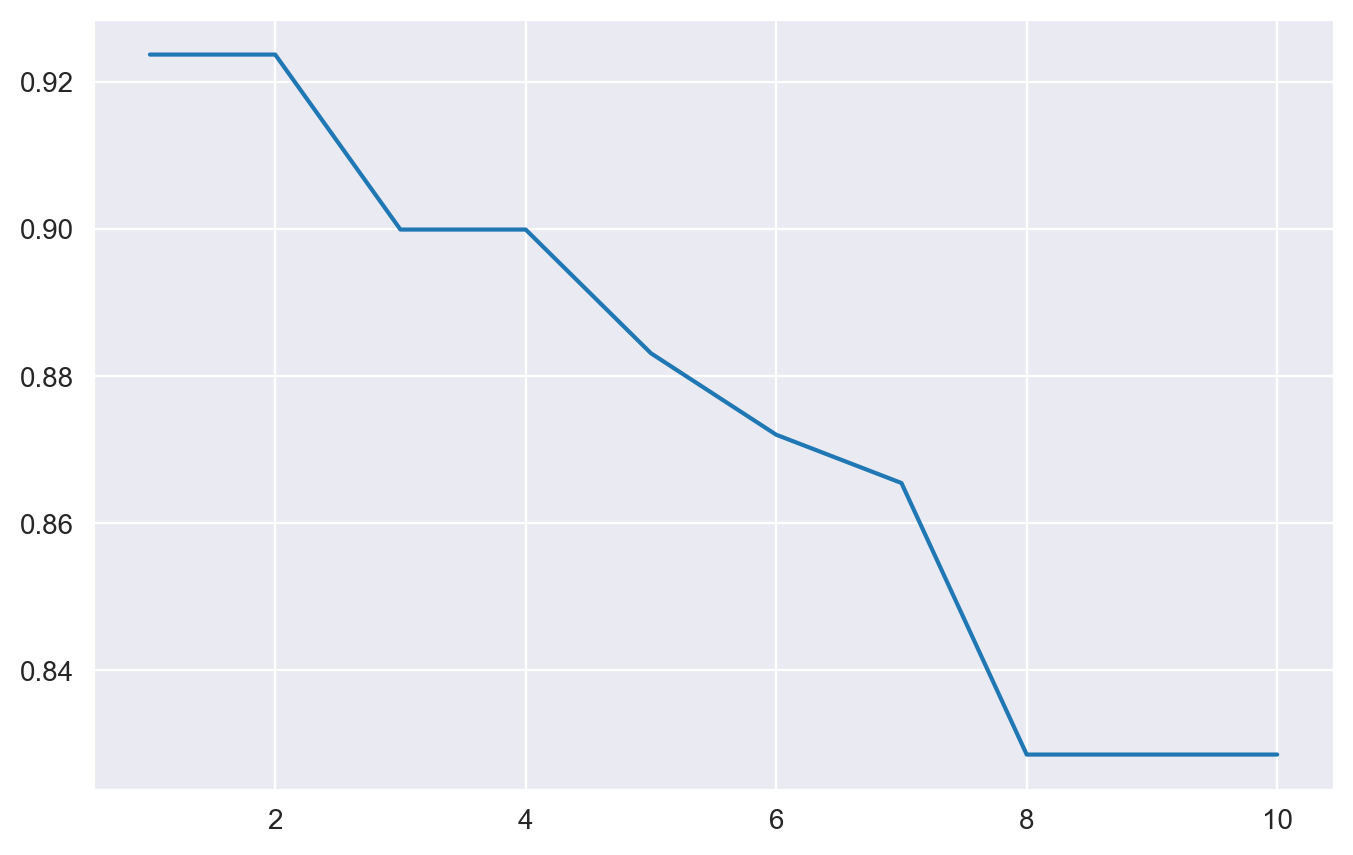

In [20]:
scores = []
for min_samples_split in range(1, 11):
    mod = DecisionTree(feature_types=np.full((feat.shape[1]), 'categorical'), min_samples_split=min_samples_split)
    mod.fit(feat_train.to_numpy(), target_train.to_numpy().ravel())

    score = accuracy_score(target_test.to_numpy().ravel().astype(int), mod.predict(feat_test.to_numpy()))
    scores.append(score)
plt.plot(range(1, 11), scores)
plt.show()

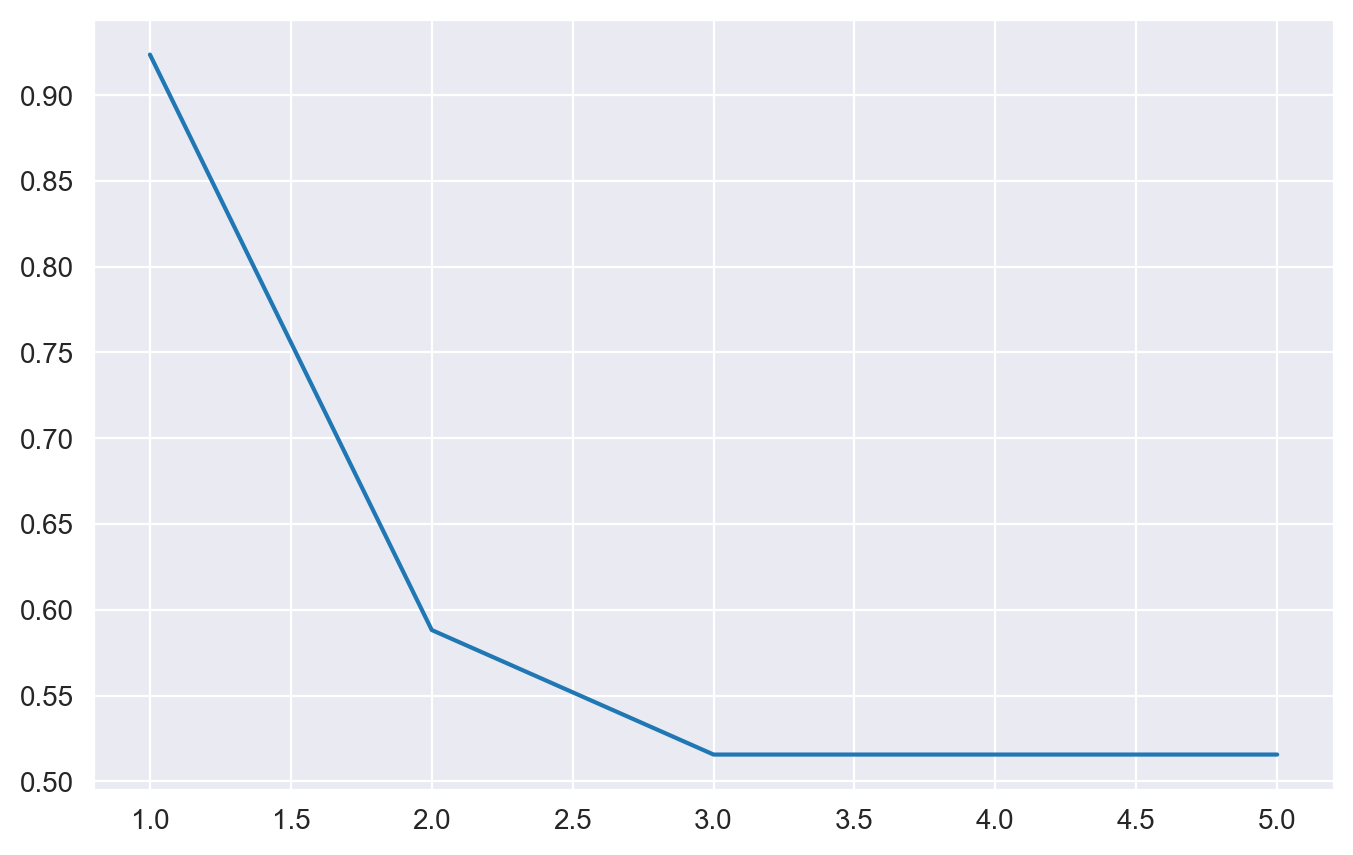

In [21]:
scores = []
for min_samples_leaf in range(1, 6):
    mod = DecisionTree(feature_types=np.full((feat.shape[1]), 'categorical'), min_samples_leaf=min_samples_leaf)
    mod.fit(feat_train.to_numpy(), target_train.to_numpy().ravel())

    score = accuracy_score(target_test.to_numpy().ravel().astype(int), mod.predict(feat_test.to_numpy()))
    scores.append(score)
plt.plot(range(1, 6), scores)
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [22]:
from ucimlrepo import fetch_ucirepo 

tic_tac_toe_endgame = fetch_ucirepo(id=101) 

tic_tac_x = tic_tac_toe_endgame.data.features 
tic_tac_y = tic_tac_toe_endgame.data.targets 

car_evaluation = fetch_ucirepo(id=19) 

car_x = car_evaluation.data.features 
car_y = car_evaluation.data.targets 

nursery = fetch_ucirepo(id=76) 

nursery_x = nursery.data.features 
nursery_y = nursery.data.targets

In [23]:
tic_tac_y['class'] = np.int32(tic_tac_y['class'] == 'positive')
car_y['class'] = np.int32((car_y['class'] == 'good') | (car_y['class'] == 'vgood'))
nursery_y['class'] = np.int32((nursery_y['class'] == 'very_recom') | (nursery_y['class'] == 'priority') | (nursery_y['class'] == 'spec_prior'))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
sktree = DecisionTreeClassifier()

train1 = feat.copy()
for name in train1.columns:
    enc = LabelEncoder()
    train1[name] = enc.fit_transform(train1[name])
train2 = tic_tac_x.copy()
for name in train2.columns:
    enc = LabelEncoder()
    train2[name] = enc.fit_transform(train2[name])
train3 = car_x.copy()
for name in train3.columns:
    enc = LabelEncoder()
    train3[name] = enc.fit_transform(train3[name])
train4 = nursery_x.copy()
for name in train4.columns:
    enc = LabelEncoder()
    train4[name] = enc.fit_transform(train4[name])

In [107]:
import hw5code
import importlib
importlib.reload(hw5code)

result = pd.DataFrame({
    'real': [0, 0, 0, 0],
    'categorical': [0, 0, 0, 0],
    'real + one-hot': [0, 0, 0, 0,],
    'sklearn': [0, 0, 0, 0]
})

tree = hw5code.DecisionTree(feature_types=["real"] * train1.shape[1])
score = cross_val_score(tree, train1.to_numpy(), target.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['real'][0] = score.mean()

tree = hw5code.DecisionTree(feature_types=["real"] * train2.shape[1])
score = cross_val_score(tree, train2.to_numpy(), tic_tac_y.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['real'][1] = score.mean()

tree = hw5code.DecisionTree(feature_types=["real"] * train3.shape[1])
score = cross_val_score(tree, train3.to_numpy(), car_y.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['real'][2] = score.mean()

tree = hw5code.DecisionTree(feature_types=["real"] * train4.shape[1])
score = cross_val_score(tree, train4.to_numpy(), nursery_y.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['real'][3] = score.mean()

In [108]:
tree = hw5code.DecisionTree(feature_types=["categorical"] * train1.shape[1])
score = cross_val_score(tree, train1.to_numpy(), target.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['categorical'][0] = score.mean()

tree = hw5code.DecisionTree(feature_types=["categorical"] * train2.shape[1])
score = cross_val_score(tree, train2.to_numpy(), tic_tac_y.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['categorical'][1] = score.mean()

tree = hw5code.DecisionTree(feature_types=["categorical"] * train3.shape[1])
score = cross_val_score(tree, train3.to_numpy(), car_y.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['categorical'][2] = score.mean()

tree = hw5code.DecisionTree(feature_types=["categorical"] * train4.shape[1])
score = cross_val_score(tree, train4.to_numpy(), nursery_y.to_numpy().ravel().astype(np.int32), cv=10, scoring=make_scorer(accuracy_score))
result['categorical'][3] = score.mean()

In [120]:
from sklearn.preprocessing import OneHotEncoder

train11 = feat.copy()
encoder = OneHotEncoder(sparse_output=False)
train11 = encoder.fit_transform(train11, target)

train21 = tic_tac_x.copy()
encoder = OneHotEncoder(sparse_output=False)
train21 = encoder.fit_transform(train21, tic_tac_y)

train31 = car_x.copy()
encoder = OneHotEncoder(sparse_output=False)
train31 = encoder.fit_transform(train31, car_y)

train41 = nursery_x.copy()
encoder = OneHotEncoder(sparse_output=False)
train41 = encoder.fit_transform(train41, nursery_y)

In [127]:
tree = hw5code.DecisionTree(feature_types=["categorical"] * train11.shape[1])
score = cross_val_score(tree, train11, target.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['real + one-hot'][0] = score.mean()

tree = hw5code.DecisionTree(feature_types=["categorical"] * train21.shape[1])
score = cross_val_score(tree, train21, tic_tac_y.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['real + one-hot'][1] = score.mean()

tree = hw5code.DecisionTree(feature_types=["categorical"] * train31.shape[1])
score = cross_val_score(tree, train31, car_y.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['real + one-hot'][2] = score.mean()

tree = hw5code.DecisionTree(feature_types=["categorical"] * train41.shape[1])
score = cross_val_score(tree, train41, nursery_y.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['real + one-hot'][3] = score.mean()

In [128]:
tree = DecisionTreeClassifier()
score = cross_val_score(tree, train1, target.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['sklearn'][0] = score.mean()

tree = DecisionTreeClassifier()
score = cross_val_score(tree, train2, tic_tac_y.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['sklearn'][1] = score.mean()

tree = DecisionTreeClassifier()
score = cross_val_score(tree, train3, car_y.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['sklearn'][2] = score.mean()

tree = DecisionTreeClassifier()
score = cross_val_score(tree, train4, nursery_y.to_numpy().ravel().astype(np.int32), cv=10, scoring='accuracy')
result['sklearn'][3] = score.mean()

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

In [129]:
result

,real,categorical,real + one-hot,sklearn
0,0.925660,0.881262,0.918790,0.964817
1,0.483388,0.450033,0.495877,0.795647
2,0.914777,0.924150,0.919368,0.943285
3,0.666512,0.666512,0.666512,0.999691


Вставьте что угодно, описывающее ваши впечатления от этого задания: